In [1]:
!pip uninstall tensorflow -y

Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Successfully uninstalled tensorflow-2.7.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!nvidia-smi

Wed Nov 24 21:08:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [5]:
!pip install tensorflow==2.4.0

     |████████████████████████████████| 394.7 MB 18 kB/s 
     |████████████████████████████████| 462 kB 38.5 MB/s 
     |████████████████████████████████| 3.8 MB 41.0 MB/s 
     |████████████████████████████████| 2.9 MB 40.4 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68719 sha256=f91dfb7de5ea6397e3caf30f0cdd18f00bf4cdbdbc4dae118cd01b181dfcf4d6
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.13.3
    Uninstalling wrapt-1.13.3:
      Suc

In [3]:
import os
import sys
import random
import math
import re
from os.path import isfile, join
import cv2
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import scipy

In [7]:
ROOT_DIR = os.path.abspath("/content/drive/MyDrive/finalRun/Mask_RCNN")
import warnings
warnings.filterwarnings("ignore")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline

In [8]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join('', "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# # Directory of images to run detection on
# IMAGE_DIR = os.path.join(ROOT_DIR, "images")

... done downloading pretrained model!


In [9]:
class InferenceConfig(coco.CocoConfig):
    #batch size to 1, Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [10]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir='mask_rcnn_coco.hy', config=config)

# Load weights trained on MS-COCO
model.load_weights('mask_rcnn_coco.h5', by_name=True)

Instructions for updating:
Use fn_output_signature instead


In [14]:
model.keras_model.summary()


Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________

In [ ]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

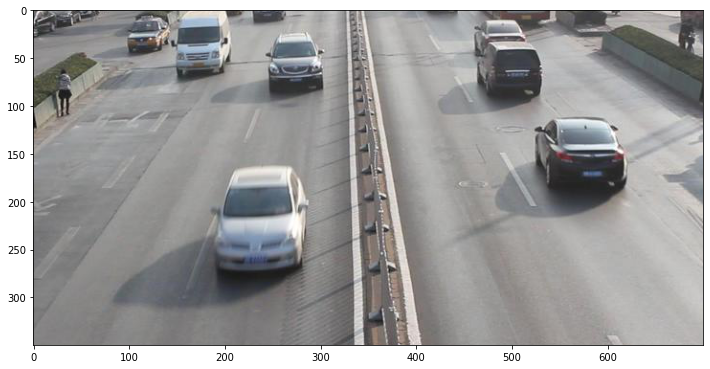

In [6]:
image = skimage.io.imread('/content/drive/MyDrive/IT-CV/Datasets/UA-DETRAC/Train/IMGS/MVI_20034/img00613.jpg')


# original image
img = image[100:450,200:900]
plt.figure(figsize=(12,10))
plt.imshow(img)
# plt.figure(figsize=(12,10))
# skimage.io.imshow(image)
# image.shape

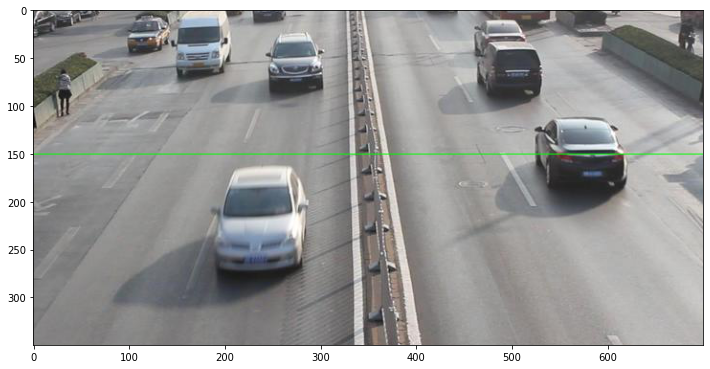

In [7]:
cv2.line(img, (0, 150),(700,150),(0, 255, 0))
plt.figure(figsize=(12,10))
plt.imshow(img)

In [ ]:
results = model.detect([img], verbose=1)

Processing 1 images
image                    shape: (300, 620, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


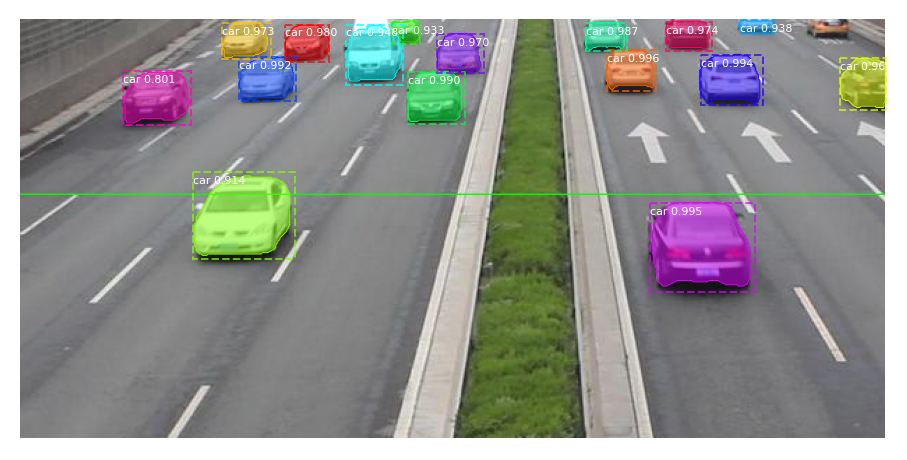

In [ ]:
# Visualize results
r = results[0]
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [ ]:
rois = r['rois'];
class_ids = r['class_ids']
filter_classs_names = ['bicycle', 'car', 'motorcycle','bus','truck']
l = []
for i in range(0,len(rois)):
  if class_names[class_ids[i]] in filter_classs_names:
    print(f'{rois[i]} {class_names[class_ids[i]]}')
    l.append(rois[i])
temp = []
for i in l:
  h = i[2] - i[0]
  m = i[2] + h/2
  dist = m - 150
  temp.append(dist)
temp = sorted(temp,key=abs)
temp = temp[0:3]

[183 534 276 647] car
[ 61 438 107 495] car
[ 66  98 113 147] car
[36  1 66 26] car
[ 34  97  67 177] car
[27 15 57 53] car
[20 41 48 73] car
[12 65 36 87] car
[ 98 163 150 228] car
[ 9 77 31 97] car
[  6  90  26 108] car
[  0 589  21 632] car
[  0 554  13 579] car


In [ ]:
dir_name =  os.path.abspath('/content/drive/MyDrive/IT-CV/Datasets/UA-DETRAC/Test/IMGS/MVI_20034_hist')
# out_dir_name =  os.path.abspath('/content/drive/MyDrive/IT-CV/Datasets/UA-DETRAC/Test/IMGS/MVI_20034_hist_0ut_l1')
# os.mkdir(out_dir_name)
list_of_files = sorted( filter( lambda x: os.path.isfile(os.path.join(dir_name, x)),
                        os.listdir(dir_name) ) )
l2 = []
l1 = []
for i in list_of_files:
  image = skimage.io.imread(dir_name +'/' + i)
  image = image[100:450,200:900]
  cv2.line(image, (0, 150),(700,150),(0, 255, 0))
  results = model.detect([image], verbose=0)
  r = results[0]
  rois = r['rois'];
  class_ids = r['class_ids']
  filter_classs_names = ['bicycle', 'car', 'motorcycle','bus','truck']
  l = []
  for j in range(0,len(rois)):
    if class_names[class_ids[j]] in filter_classs_names:
      l.append(rois[j])
  temp = []
  for k in l:
    h = k[2] - k[0]
    m = k[2] + h/2
    dist = m - 150
    temp.append(dist)
  # temp = sorted(temp,key=abs)
  # while(len(temp)<3):
  #   temp.append(-125)
  # temp = temp[0:3]
  l2.append(temp)
  l1.append(l)
  # visualize.save_image(image,i[:-4], r['rois'], r['masks'], r['class_ids'],r['scores'],class_names,filter_classs_names = ['bicycle', 'car', 'motorcycle','bus','truck'],save_dir=out_dir_name)
  print(f"{i}th frame Done")

img00001.jpgth frame Done
img00002.jpgth frame Done
img00003.jpgth frame Done
img00004.jpgth frame Done
img00005.jpgth frame Done
img00006.jpgth frame Done
img00007.jpgth frame Done
img00008.jpgth frame Done
img00009.jpgth frame Done
img00010.jpgth frame Done
img00011.jpgth frame Done
img00012.jpgth frame Done
img00013.jpgth frame Done
img00014.jpgth frame Done
img00015.jpgth frame Done
img00016.jpgth frame Done
img00017.jpgth frame Done
img00018.jpgth frame Done
img00019.jpgth frame Done
img00020.jpgth frame Done
img00021.jpgth frame Done
img00022.jpgth frame Done
img00023.jpgth frame Done
img00024.jpgth frame Done
img00025.jpgth frame Done
img00026.jpgth frame Done
img00027.jpgth frame Done
img00028.jpgth frame Done
img00029.jpgth frame Done
img00030.jpgth frame Done
img00031.jpgth frame Done
img00032.jpgth frame Done
img00033.jpgth frame Done
img00034.jpgth frame Done
img00035.jpgth frame Done
img00036.jpgth frame Done
img00037.jpgth frame Done
img00038.jpgth frame Done
img00039.jpg

In [ ]:
len(l1)

1420

In [ ]:
l2

[[58.0, 72.5, -64.5, -78.5, -75.0],
 [60.5, 74.0, -64.5, -79.0, -74.0, -104.0],
 [59.0, 78.0, -65.5, -77.5, -71.0],
 [58.5, 82.0, -79.0, -67.5, -70.5],
 [57.0, 84.0, -68.0, -83.0, -74.0],
 [56.0, 87.5, -67.5, -81.0, -68.0],
 [57.0, 95.0, -71.5, -82.5],
 [57.5, 100.0, -71.0, -64.0, -82.0],
 [55.5, 106.5, -71.0, -80.0],
 [56.5, 107.5, -72.5, -78.5, -60.5],
 [56.5, 114.5, -79.0, -57.5, -72.5, -46.5],
 [57.0, -79.5, -75.5, 120.5],
 [57.0, 126.5, -78.5, -74.0, -78.0, -49.0],
 [53.5, -75.0, -78.5, 132.5, -43.0],
 [50.5, 139.5, -77.5, -79.0, -42.5],
 [47.0, -78.0, 137.0, -45.5, -79.5],
 [53.5, -77.5, -44.5, 145.5, -78.0, -91.0],
 [49.0, -75.0, 161.0, -75.5, -23.0],
 [50.0, -75.5, 159.0, -88.0],
 [48.0, -76.0, 169.5, -39.5, -86.0],
 [46.0, -79.5, 168.5, -79.0],
 [46.0, -78.5, -37.0, -79.0, -86.5],
 [47.0, -79.5, -36.5, -83.0, -74.5],
 [46.5, -82.5, -31.5, -83.5, -49.5],
 [42.5, -83.5, -28.5, -81.5, -44.5],
 [43.0, -83.0, -82.0, -28.0, 220.5],
 [39.5, -85.5, -24.5, -82.0, 226.0],
 [42.0, -22.0,

In [ ]:
len(l2)

1420

In [ ]:
# os.mkdir('/content/drive/MyDrive/IT-CV/Datasets/UA-DETRAC/Test/Bboxes')
%cd '/content/drive/MyDrive/IT-CV/Datasets/UA-DETRAC/Test/Bboxes'

/content/drive/MyDrive/IT-CV/Datasets/UA-DETRAC/Test/Bboxes


In [ ]:
from scipy.io import savemat
scipy.io.savemat('MVI_40191_mrcnn_l1.mat', {'Bboxes': l1},{'Stcf':l2})

In [ ]:
dir_name =  os.path.abspath('/content/drive/MyDrive/IT-CV/Datasets/UA-DETRAC/Test/IMGS/MVI_40191')
# out_dir_name =  os.path.abspath('/content/drive/MyDrive/IT-CV/Datasets/UA-DETRAC/Test/IMGS/MVI_20034_hist_0ut_l1')
# os.mkdir(out_dir_name)
list_of_files = sorted( filter( lambda x: os.path.isfile(os.path.join(dir_name, x)),
                        os.listdir(dir_name) ) )
l2 = []
l1 = []
for i in list_of_files:
  image = skimage.io.imread(dir_name +'/' + i)
  image = image[100:400,180:800]
  # cv2.line(image, (0, 150),(700,150),(0, 255, 0))
  results = model.detect([image], verbose=0)
  r = results[0]
  rois = r['rois'];
  class_ids = r['class_ids']
  filter_classs_names = ['bicycle', 'car', 'motorcycle','bus','truck']
  l = []
  for j in range(0,len(rois)):
    if class_names[class_ids[j]] in filter_classs_names:
      l.append(rois[j])
  temp = []
  for k in l:
    h = k[2] - k[0]
    m = k[2] + h/2
    dist = m - 125
    temp.append(dist)
  # temp = sorted(temp,key=abs)
  # while(len(temp)<3):
  #   temp.append(-125)
  # temp = temp[0:3]
  l2.append(temp)
  l1.append(l)
  # visualize.save_image(image,i[:-4], r['rois'], r['masks'], r['class_ids'],r['scores'],class_names,filter_classs_names = ['bicycle', 'car', 'motorcycle','bus','truck'],save_dir=out_dir_name)
  print(f"{i}th frame Done")

img00001.jpgth frame Done
img00002.jpgth frame Done
img00003.jpgth frame Done
img00004.jpgth frame Done
img00005.jpgth frame Done
img00006.jpgth frame Done
img00007.jpgth frame Done
img00008.jpgth frame Done
img00009.jpgth frame Done
img00010.jpgth frame Done
img00011.jpgth frame Done
img00012.jpgth frame Done
img00013.jpgth frame Done
img00014.jpgth frame Done
img00015.jpgth frame Done
img00016.jpgth frame Done
img00017.jpgth frame Done
img00018.jpgth frame Done
img00019.jpgth frame Done
img00020.jpgth frame Done
img00021.jpgth frame Done
img00022.jpgth frame Done
img00023.jpgth frame Done
img00024.jpgth frame Done
img00025.jpgth frame Done
img00026.jpgth frame Done
img00027.jpgth frame Done
img00028.jpgth frame Done
img00029.jpgth frame Done
img00030.jpgth frame Done
img00031.jpgth frame Done
img00032.jpgth frame Done
img00033.jpgth frame Done
img00034.jpgth frame Done
img00035.jpgth frame Done
img00036.jpgth frame Done
img00037.jpgth frame Done
img00038.jpgth frame Done
img00039.jpg

In [ ]:
dir_name =  os.path.abspath('/content/drive/MyDrive/IT-CV/Datasets/UA-DETRAC/Test/IMGS/MVI_20034_hist')
# out_dir_name =  os.path.abspath('/content/drive/MyDrive/IT-CV/Datasets/UA-DETRAC/Test/IMGS/MVI_20034_hist_0ut_l1')
# os.mkdir(out_dir_name)
list_of_files = sorted( filter( lambda x: os.path.isfile(os.path.join(dir_name, x)),
                        os.listdir(dir_name) ) )
l2 = []
l1 = []
for i in list_of_files:
  image = skimage.io.imread(dir_name +'/' + i)
  image = image[100:450,200:900]
  cv2.line(image, (0, 150),(700,150),(0, 255, 0))
  results = model.detect([image], verbose=0)
  r = results[0]
  rois = r['rois'];
  class_ids = r['class_ids']
  filter_classs_names = ['bicycle', 'car', 'motorcycle','bus','truck']
  l = []
  for j in range(0,len(rois)):
    if class_names[class_ids[j]] in filter_classs_names:
      l.append(rois[j])
  temp = []
  for k in l:
    h = k[2] - k[0]
    m = k[2] + h/2
    dist = m - 150
    temp.append(dist)
  # temp = sorted(temp,key=abs)
  # while(len(temp)<3):
  #   temp.append(-125)
  # temp = temp[0:3]
  l2.append(temp)
  l1.append(l)
  # visualize.save_image(image,i[:-4], r['rois'], r['masks'], r['class_ids'],r['scores'],class_names,filter_classs_names = ['bicycle', 'car', 'motorcycle','bus','truck'],save_dir=out_dir_name)
  print(f"{i}th frame Done")

In [ ]:
l3 = [] #the 6 sequence of frames
for i in range(0,len(l2)-6):
  temp = []
  for j in range(0,6):
    temp.append(l2[i+j])
  l3.append(temp)

In [ ]:
len(l3)

2489

In [ ]:
dir_name =  os.path.abspath('/content/drive/MyDrive/IT-CV/Datasets/UA-DETRAC/Test/IMGS/MVI_39851_hist')
list_of_files = sorted( filter( lambda x: os.path.isfile(os.path.join(dir_name, x)),
                        os.listdir(dir_name) ) )
l2 = []
for i in list_of_files:
  image = skimage.io.imread(dir_name +'/' + i)
  image = image[25:400,180:800]
  cv2.line(image, (0, 125),(620,125),(0, 255, 0))
  results = model.detect([image], verbose=0)
  r = results[0]
  rois = r['rois'];
  class_ids = r['class_ids']
  filter_classs_names = ['bicycle', 'car', 'motorcycle','bus','truck']
  l = []
  for j in range(0,len(rois)):
    if class_names[class_ids[j]] in filter_classs_names:
      l.append(rois[j])
  temp = []
  for k in l:
    h = k[2] - k[0]
    m = k[2] + h/2
    dist = m - 125
    temp.append(dist)
  temp = sorted(temp,key=abs)
  # while(len(temp)<3):
  #   temp.append(-125)
  temp = temp[0:3]
  l2.append(temp)
  # visualize.save_image(image,i[:-4], r['rois'], r['masks'], r['class_ids'],r['scores'],class_names,filter_classs_names = ['bicycle', 'car', 'motorcycle','bus','truck'],save_dir=out_dir_name)
  print(f"{i}th frame Done")

img00001.jpgth frame Done
img00002.jpgth frame Done
img00003.jpgth frame Done
img00004.jpgth frame Done
img00005.jpgth frame Done
img00006.jpgth frame Done
img00007.jpgth frame Done
img00008.jpgth frame Done
img00009.jpgth frame Done
img00010.jpgth frame Done
img00011.jpgth frame Done
img00012.jpgth frame Done
img00013.jpgth frame Done
img00014.jpgth frame Done
img00015.jpgth frame Done
img00016.jpgth frame Done
img00017.jpgth frame Done
img00018.jpgth frame Done
img00019.jpgth frame Done
img00020.jpgth frame Done
img00021.jpgth frame Done
img00022.jpgth frame Done
img00023.jpgth frame Done
img00024.jpgth frame Done
img00025.jpgth frame Done
img00026.jpgth frame Done
img00027.jpgth frame Done
img00028.jpgth frame Done
img00029.jpgth frame Done
img00030.jpgth frame Done
img00031.jpgth frame Done
img00032.jpgth frame Done
img00033.jpgth frame Done
img00034.jpgth frame Done
img00035.jpgth frame Done
img00036.jpgth frame Done
img00037.jpgth frame Done
img00038.jpgth frame Done
img00039.jpg

In [ ]:
len(l2)


NameError: ignored

In [ ]:
for i in range(0,len(l2)):
  while(len(l2[i])<3):
    l2[i].append(0)

In [ ]:
l2

[[-4.0, -86.0, -106.0],
 [-5.5, -88.5, -106.5],
 [-9.5, -93.0, -107.5],
 [-14.5, -92.0, -106.5],
 [-13.0, -91.0, -107.0],
 [-15.0, -92.5, -104.0],
 [-18.0, -93.5, -103.0],
 [-33.5, -62.5, -96.5],
 [-22.0, -98.0, -103.0],
 [-27.0, -99.5, -103.0],
 [-31.0, -100.5, -106.5],
 [-32.0, -100.5, -103.0],
 [-33.0, -100.5, -101.0],
 [-35.0, -101.5, -102.5],
 [-42.0, -101.5, -105.5],
 [-42.0, -103.0, -109.5],
 [-44.0, 90.0, -105.0],
 [-46.0, -104.0, -112.5],
 [-44.0, -102.5, -112.5],
 [-48.0, -101.0, -114.0],
 [-49.5, -102.0, -114.0],
 [-52.0, -101.5, -114.0],
 [-53.0, -100.0, -114.0],
 [-53.5, -98.0, -117.0],
 [-56.0, 61.5, 92.0],
 [-60.0, -108.0, -126.0],
 [-61.0, -106.5, -124.5],
 [-64.5, -102.0, -124.5],
 [-62.5, 92.5, -106.0],
 [-66.5, -103.5, -124.5],
 [-72.0, -100.5, -117.0],
 [-70.5, -102.0, -114.5],
 [-73.0, 92.0, -101.0],
 [-73.5, 92.5, -99.5],
 [-75.5, -116.0, -123.0],
 [-77.0, -105.0, -116.0],
 [-80.0, -99.0, -115.0],
 [-83.5, -102.5, -114.5],
 [-87.0, -100.0, -114.0],
 [-88.5, -104.5

In [ ]:
l3 = [] #the 6 sequence of frames
for i in range(0,len(l2)-6):
  temp = []
  for j in range(0,6):
    temp.append(l2[i+j])
  l3.append(temp)

In [ ]:
l3

[[[-4.0, -86.0, -106.0],
  [-5.5, -88.5, -106.5],
  [-9.5, -93.0, -107.5],
  [-14.5, -92.0, -106.5],
  [-13.0, -91.0, -107.0],
  [-15.0, -92.5, -104.0]],
 [[-5.5, -88.5, -106.5],
  [-9.5, -93.0, -107.5],
  [-14.5, -92.0, -106.5],
  [-13.0, -91.0, -107.0],
  [-15.0, -92.5, -104.0],
  [-18.0, -93.5, -103.0]],
 [[-9.5, -93.0, -107.5],
  [-14.5, -92.0, -106.5],
  [-13.0, -91.0, -107.0],
  [-15.0, -92.5, -104.0],
  [-18.0, -93.5, -103.0],
  [-33.5, -62.5, -96.5]],
 [[-14.5, -92.0, -106.5],
  [-13.0, -91.0, -107.0],
  [-15.0, -92.5, -104.0],
  [-18.0, -93.5, -103.0],
  [-33.5, -62.5, -96.5],
  [-22.0, -98.0, -103.0]],
 [[-13.0, -91.0, -107.0],
  [-15.0, -92.5, -104.0],
  [-18.0, -93.5, -103.0],
  [-33.5, -62.5, -96.5],
  [-22.0, -98.0, -103.0],
  [-27.0, -99.5, -103.0]],
 [[-15.0, -92.5, -104.0],
  [-18.0, -93.5, -103.0],
  [-33.5, -62.5, -96.5],
  [-22.0, -98.0, -103.0],
  [-27.0, -99.5, -103.0],
  [-31.0, -100.5, -106.5]],
 [[-18.0, -93.5, -103.0],
  [-33.5, -62.5, -96.5],
  [-22.0, -98.0,

In [ ]:
%cd '/content/drive/MyDrive/IT-CV/Datasets/UA-DETRAC/Test/stcf'

/content/drive/.shortcut-targets-by-id/1-8epRl3k9mbckPsyVarMmetjcEFVcw-_/IT-CV/Datasets/UA-DETRAC/Test/stcf


In [ ]:
from scipy.io import savemat
scipy.io.savemat('MVI_20034_hist_mrcnn.mat', {'Sequences': l3})